<a href="https://colab.research.google.com/github/Fahmidanishi/CODES/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset = dataset.drop(columns=['CustomerID','Genre','Age'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.shape

(200, 2)

##Elbow method


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,15):
  kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmean.fit(dataset)
  wcss.append(kmean.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

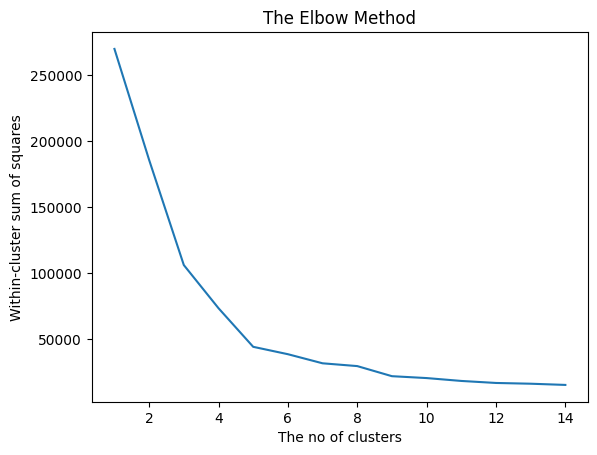

In [ ]:
plt.plot(range(1,15),wcss)
plt.xlabel('The no of clusters')

plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method')


In [ ]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [ ]:
kmean.fit(dataset)

KMeans(n_clusters=5, random_state=0)

In [ ]:
cluster_num = kmean.fit_predict(dataset) # kon data kon cluster e
cluster_num

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
dataset['cluster_number']=cluster_num

##We are going to use fit predict method that returns for each #observation which cluster it belongs to

In [ ]:
dataset # dataset e new column add hoise cluster_number

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [ ]:
dataset.groupby(['cluster_number']).count()

,Annual Income (k$),Spending Score (1-100)
cluster_number,,
0,81,81
1,39,39
2,35,35
3,23,23
4,22,22


##visualization

In [ ]:
x = pd.read_csv('/content/Mall_Customers.csv')


In [ ]:
x = x.drop(columns=['CustomerID','Genre','Age'])

In [ ]:
cluster_num = kmean.fit_predict(dataset)

In [ ]:
print(cluster_num.shape)
print(cluster_num.dtype)

(200,)
int32


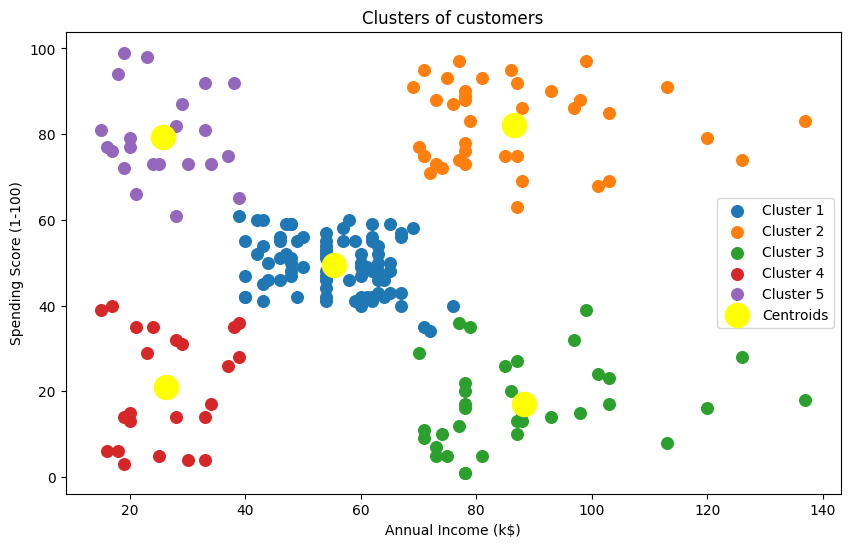

In [ ]:
#visulalizing the cluster
plt.figure(figsize=(10,6))
k = 5
#loop through the clusters
for i in range(k):
  if isinstance(x,np.ndarray): #if x is a NumPy array
    plt.scatter(x[cluster_num == i, 0], x[cluster_num ==i, 1],s = 70, label = f'Cluster {i+1}') #s=size of the points
  else: #if x is a pandas dataframe
      plt.scatter(dataset.iloc[cluster_num ==i, 0], x.iloc[cluster_num ==i, 1], s=70, label=f'Cluster {i+1}')

#plot the centroids
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s= 300, c='yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


